In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import random
import numpy as np

In [14]:
!pip install torch torchvision torchaudio

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 1.0/216.1 MB 10.1 MB/s eta 0:00:22
   - -------------------------------------- 6.3/216.1 MB 24.1 MB/s eta 0:00:09
   - -------------------------------------- 10.2/216.1 MB 19.3 MB/s eta 0:00:11
   -- ------------------------------------- 15.5/216.1 MB 21.1 MB/s eta 0:00:10
   ---- ----------------------------------- 25.4/216.1 MB 25.5 MB/s eta 0:00:08
   ------ --------------------------------- 34.9/216.1 MB 29.1 MB/s eta 0:00:07
   ------- -------------------------------- 40.1/216.1 MB 29.3 MB/s eta 0:00:07
   -------- ------------------------------- 48.0/216.1 MB 29.1 MB/s eta 0:00:06
   ---------- ----------------------------- 55.6/216.1 MB 29.3 MB/s eta 0:00:06
   ----------- ---------------------------- 63.7/216.1 MB 29.9 MB/s eta 0:00:06
   ------------- -------------------------- 73.4/216.1 MB 31.0 MB/s e

In [9]:
import os
import shutil
import random

original_dataset = r'C:/Users/gusta/Documents/Projeto_Carros/old_dataset'
destino_base = r'C:/Users/gusta/Documents/Projeto_Carros/new_dataset'
train_path = os.path.join(destino_base, "train")
test_path = os.path.join(destino_base, "test")
external_path = os.path.join(destino_base, "external")
split_train = 0.7
split_test = 0.2
split_external = 0.1

mapa_classes = {
    "fake_image": "fake",
    "real_image": "real"
}

extensoes_validas = (".jpg", ".jpeg", ".png", ".bmp")

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)
os.makedirs(external_path, exist_ok=True)


for classe_antiga in os.listdir(original_dataset):
    classe_path = os.path.join(original_dataset, classe_antiga)
    if not os.path.isdir(classe_path):
        continue

    classe = mapa_classes.get(classe_antiga, classe_antiga)

    imagens = [f for f in os.listdir(classe_path) if f.lower().endswith(extensoes_validas)]
    random.shuffle(imagens)

    total = len(imagens)
    train_end = int(total * split_train)
    test_end = train_end + int(total * split_test)

    imagens_train = imagens[:train_end]
    imagens_test = imagens[train_end:test_end]
    imagens_external = imagens[test_end:]

    os.makedirs(os.path.join(train_path, classe), exist_ok=True)
    os.makedirs(os.path.join(test_path, classe), exist_ok=True)
    os.makedirs(os.path.join(external_path, classe), exist_ok=True)

    for img in imagens_train:
        src = os.path.join(classe_path, img)
        dst = os.path.join(train_path, classe, img)
        try:
            shutil.copy2(src, dst)
        except Exception as e:
            print(f"Erro ao copiar {src}: {e}")

    for img in imagens_test:
        src = os.path.join(classe_path, img)
        dst = os.path.join(test_path, classe, img)
        try:
            shutil.copy2(src, dst)
        except Exception as e:
            print(f"Erro ao copiar {src}: {e}")

    for img in imagens_external:
        src = os.path.join(classe_path, img)
        dst = os.path.join(external_path, classe, img)
        try:
            shutil.copy2(src, dst)
        except Exception as e:
            print(f"Erro ao copiar {src}: {e}")

print("Dataset pronto! Estrutura compatível")


✅ Dataset pronto! Estrutura compatível com Keras/TensorFlow/PyTorch 🎯


In [156]:
import pandas as pd

In [158]:
from pathlib import Path
import pandas as pd
from tqdm import tqdm

file_names = []
labels = []

base_path = Path(r'C:/Users/gusta/Documents/Projeto_Carros/new_dataset')

for file in sorted(base_path.glob('*/*/*.*')):
    if file.is_file():
        label = file.parts[-2]
        file_names.append(str(file))
        labels.append(label)

df = pd.DataFrame({"image": file_names, "label": labels})

In [160]:
df.head()

image label
0  C:\Users\gusta\Documents\Projeto_Carros\new_da...  fake
1  C:\Users\gusta\Documents\Projeto_Carros\new_da...  fake
2  C:\Users\gusta\Documents\Projeto_Carros\new_da...  fake
3  C:\Users\gusta\Documents\Projeto_Carros\new_da...  fake
4  C:\Users\gusta\Documents\Projeto_Carros\new_da...  fake

In [162]:
df.label.value_counts()

label
real    210
fake    130
Name: count, dtype: int64

In [164]:
df.label.unique()

array(['fake', 'real'], dtype=object)

In [166]:
print(df['label'].value_counts())

label
real    210
fake    130
Name: count, dtype: int64


In [168]:
print(df['label'].value_counts())
print(df.head())

label
real    210
fake    130
Name: count, dtype: int64
                                               image label
0  C:\Users\gusta\Documents\Projeto_Carros\new_da...  fake
1  C:\Users\gusta\Documents\Projeto_Carros\new_da...  fake
2  C:\Users\gusta\Documents\Projeto_Carros\new_da...  fake
3  C:\Users\gusta\Documents\Projeto_Carros\new_da...  fake
4  C:\Users\gusta\Documents\Projeto_Carros\new_da...  fake


In [170]:
df.tail()

image label
335  C:\Users\gusta\Documents\Projeto_Carros\new_da...  real
336  C:\Users\gusta\Documents\Projeto_Carros\new_da...  real
337  C:\Users\gusta\Documents\Projeto_Carros\new_da...  real
338  C:\Users\gusta\Documents\Projeto_Carros\new_da...  real
339  C:\Users\gusta\Documents\Projeto_Carros\new_da...  real

In [172]:
df.describe()

image label
count                                                 340   340
unique                                                340     2
top     C:\Users\gusta\Documents\Projeto_Carros\new_da...  real
freq                                                    1   210

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   340 non-null    object
 1   label   340 non-null    object
dtypes: object(2)
memory usage: 5.4+ KB


In [176]:
X = df.drop(columns='label', axis=1)
y = df.label

In [178]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [182]:
features = []

for img_path in tqdm(df['image'], desc="Extraindo features"):
    feat = extract_features(img_path)
    features.append(feat)

X_feat = pd.DataFrame(features)
y = df['label']

Extraindo features: 100%|████████████████████████████████████████████████████████████| 340/340 [01:32<00:00,  3.68it/s]


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2, stratify=y, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       1.00      0.92      0.96        26
        real       0.95      1.00      0.98        42

    accuracy                           0.97        68
   macro avg       0.98      0.96      0.97        68
weighted avg       0.97      0.97      0.97        68



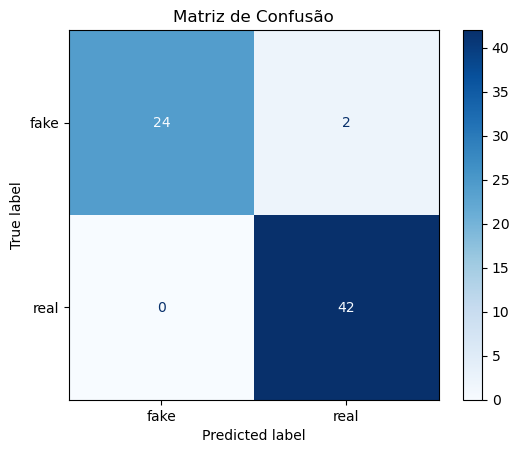

In [184]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

plt.title("Matriz de Confusão")
plt.show()